<a href="https://colab.research.google.com/github/berthine/AMMI_git/blob/master/Financial_Resilience_Python_StarterNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UmojaHack Africa 2021 #3: Financial Resilience Challenge (BEGINNER) by UmojaHack Africa

Can you predict if an individual will be able to make a payment in an emergency situation?

The objective of this challenge is to build a machine learning model to predict which individuals across Africa and around the world are most likely to be financially resilient.


![Umoja Hack](https://zindpublic.blob.core.windows.net/public/uploads/competition/image/151/thumb_cdf71374-9857-44bb-8216-5f8c67afb51f.png)

This is a simple Python starter notebook to get you started with the Financial Resilience Challenge.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip3 install lightgbm

    100% |████████████████████████████████| 2.0MB 425kB/s ta 0:00:01


In [ ]:
# Load files
train = pd.read_csv('/content/drive/MyDrive/Umoja_hackaton_africa/Umoja_africa/Train(3).csv')
test = pd.read_csv('/content/drive/MyDrive/Umoja_hackaton_africa/Umoja_africa/Test.csv')
samplesubmission = pd.read_csv('/content/drive/MyDrive/Umoja_hackaton_africa/Umoja_africa/SampleSubmission(1).csv')
variable_definations = pd.read_csv('/content/drive/MyDrive/Umoja_hackaton_africa/Umoja_africa/VariableDefinitions(2).csv')

In [ ]:
# Preview the first five rows of the train set
train.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,2,2,2,2,2,1,2,2,1,2.0,1.0,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,NaN,NaN,2.0,2.0,2,NaN,1.0,1.0,2,2,2,2,1,2,2,2,1,2,2.0,2.0,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,1.0,1.0,2.0,2.0,2,NaN,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,2,NaN,1.0,1.0,1,1,2,1,1,2,2,2,1,2,NaN,NaN,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,1,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [ ]:
# Preview the first five rows of the test set
test.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444.5,62.0,2,NaN,NaN,2.0,2.0,1,1.0,1.0,1.0,2,3,2,1,1,2,2,2,2,2,2.0,2.0,2,1,1.0,2,2,2.0,NaN,1.0,1.0
1,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168.0,32.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,2,2,2,2,3,2,2,2,2,2.0,2.0,2,2,NaN,2,2,2.0,2.0,1.0,2.0
2,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520.0,73.0,1,1.0,1.0,2.0,2.0,2,NaN,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2,2,NaN,2,1,2.0,1.0,1.0,1.0
3,ID_0000778100,Japan,High income: OECD,110566824.0,67.0,1,1.0,1.0,1.0,2.0,1,1.0,1.0,1.0,1,1,2,1,1,2,2,2,2,2,NaN,NaN,1,1,2.0,1,1,NaN,NaN,1.0,NaN
4,ID_0001123210,Morocco,Middle East & North Africa (excluding high income),25550170.0,32.0,1,1.0,1.0,2.0,2.0,2,NaN,2.0,1.0,2,2,2,2,2,2,2,2,2,1,2.0,1.0,2,2,NaN,2,2,2.0,2.0,1.0,1.0


In [ ]:
# Preview the first five rows of the sample submission file
samplesubmission.head()

,ID,target
0,ID_0000005111,NaN
1,ID_0000389416,NaN
2,ID_0000634789,NaN
3,ID_0000778100,NaN
4,ID_0001123210,NaN


In [ ]:
train['owns_mobile'].unique()

array([ 1.,  2.,  4.,  3., nan])

In [ ]:
train['Q11'].unique()

array([2, 1, 4, 3])

In [ ]:
# Preview variable definations
variable_definations

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


In [ ]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (104867, 36)
The shape of the test set is: (44943, 35)


### Check for missing values

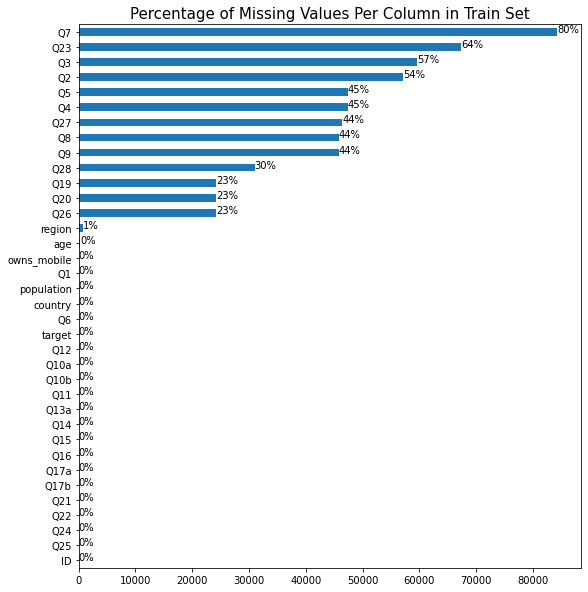

In [ ]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

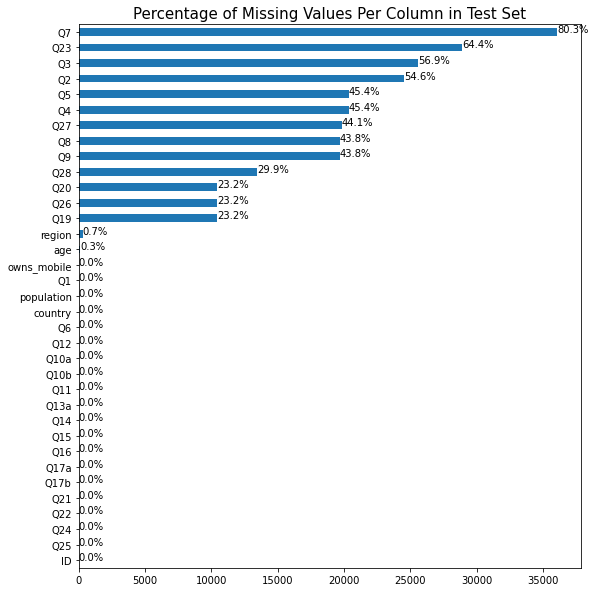

In [ ]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
#Drop some features
train = train.drop(['Q7', 'Q23', 'Q2', 'Q3'],axis=1)
test = test.drop(['Q7', 'Q23', 'Q2', 'Q3'],axis=1)

In [ ]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [ ]:
train.shape

(104867, 32)

## Distribution of the target variable

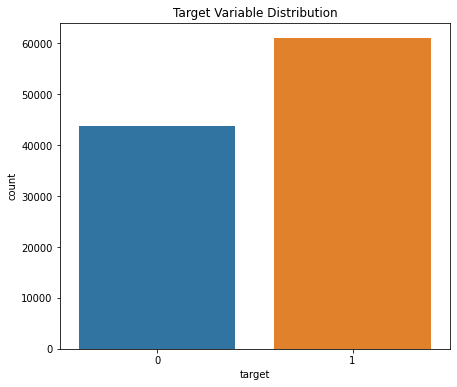

In [ ]:
plt.figure(figsize=(7, 6))
sns.countplot(train.target)
plt.title('Target Variable Distribution');

This shows us that the target (Can you make a payment if you were in an emergency) is fairly balanced. The majority class in this dataset are people who can make a payment incase of an emergency

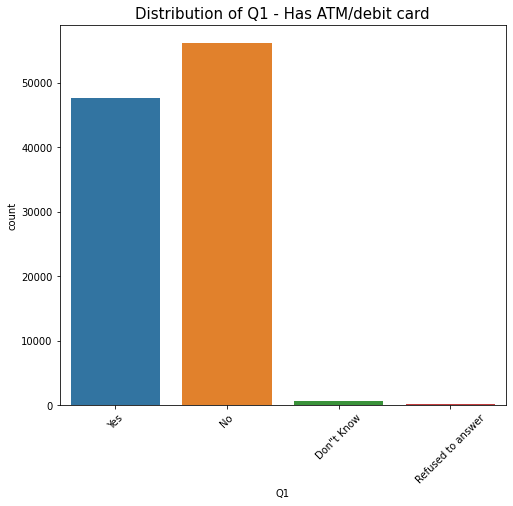

In [ ]:
# Q1 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(train.Q1)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Distribution of Q1 - Has ATM/debit card', fontdict = {'size': 15});

This shows that most people do not own a debit or ATM card

## Combine train and test set for easy preprocessing 

In [ ]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (149810, 32)


In [ ]:
# Check the column names and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           149810 non-null  object 
 1   country      149810 non-null  object 
 2   region       148830 non-null  object 
 3   population   149810 non-null  float64
 4   age          149399 non-null  float64
 5   Q1           149810 non-null  int64  
 6   Q4           82004 non-null   float64
 7   Q5           82004 non-null   float64
 8   Q6           149810 non-null  int64  
 9   Q8           84272 non-null   float64
 10  Q9           84272 non-null   float64
 11  Q10a         149810 non-null  int64  
 12  Q10b         149810 non-null  int64  
 13  Q11          149810 non-null  int64  
 14  Q12          149810 non-null  int64  
 15  Q13a         149810 non-null  int64  
 16  Q14          149810 non-null  int64  
 17  Q15          149810 non-null  int64  
 18  Q16          149810 non-

In [ ]:
# Category columns
cat_cols = ['country',	'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['age', 'population']

# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       148830 non-null  category
 3   population   149810 non-null  float64 
 4   age          149399 non-null  float64 
 5   Q1           149810 non-null  category
 6   Q4           82004 non-null   category
 7   Q5           82004 non-null   category
 8   Q6           149810 non-null  category
 9   Q8           84272 non-null   category
 10  Q9           84272 non-null   category
 11  Q10a         149810 non-null  category
 12  Q10b         149810 non-null  category
 13  Q11          149810 non-null  category
 14  Q12          149810 non-null  category
 15  Q13a         149810 non-null  category
 16  Q14          149810 non-null  category
 17  Q15          149810 non-null  category
 18  Q16 

### Number of unique values per categorical column

In [ ]:
# Check unique values for each categorical column
for col in cat_cols:
  print(col, all_data[col].nunique())

country 144
region 8
owns_mobile 4
Q1 4
Q4 4
Q5 4
Q6 4
Q8 4
Q9 4
Q10a 4
Q10b 4
Q11 4
Q12 4
Q13a 4
Q14 4
Q15 4
Q16 4
Q17a 4
Q17b 4
Q19 4
Q20 4
Q21 4
Q22 4
Q24 4
Q25 4
Q26 4
Q27 4
Q28 4


## Fill in missing values
Missing values can be filled using different strategies
 - Mean
 - Max
 - Min
 - for categorical variables - mode
 - [sklearn SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
 - Others... do more reasearch

In [ ]:

# def to_bool(x):
#   """
#   this function converts 0's and 1's to False and True respectively
#   """
#   if x == 0: return False
#   elif x == 1: return True
#   else: return

# def fillna(df):
#     np.random.seed(1) 
#     for c in df.columns:
#         if df[c].isna().sum():
#             val = np.random.choice(df[c][(1-pd.isna(df[c])).apply(lambda x: to_bool(x))])
#             df[c] = df[c].fillna(value=val)
#     return df

In [ ]:
# fillna(all_data)

In [ ]:
# Confirm that there aren't any missing values
all_data[all_data.columns.difference(['target'])].isna().sum().any()

True

In [ ]:
def to_bool(x):
  """
  this function converts 0's and 1's to False and True respectively
  """
  if x == 0: return False
  elif x == 1: return True
  else: return

# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in all_data.columns:
  if col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  elif col in num_cols:
    val = np.random.choice(all_data[col][(1-pd.isna(all_data[col])).apply(lambda x: to_bool(x))])
    all_data[col] = all_data[col].fillna(all_data[col].fillna(value=val))

# Confirm that there aren't any missing values
all_data[all_data.columns.difference(['target'])].isna().sum().any()

False

In [ ]:
all_data.head(3)

,ID,country,region,population,age,Q1,Q4,Q5,Q6,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,1,2,2,1,2.0,1.0,1,2,1,2,2.0,2.0,1.0,1.0,0.0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,2.0,2.0,2,1.0,1.0,2,2,2,2,1,2,2,2,1,2,2.0,2.0,1,2,2,2,2.0,1.0,1.0,1.0,1.0
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,1,2,2,2.0,2.0,1.0,1.0,0.0


### Feature Engineering
#### Try different strategies of dealing with categorical variables
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

In [ ]:
# Shape of data before encoding
all_data.shape

(149810, 32)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       149810 non-null  category
 3   population   149810 non-null  float64 
 4   age          149810 non-null  float64 
 5   Q1           149810 non-null  category
 6   Q4           149810 non-null  category
 7   Q5           149810 non-null  category
 8   Q6           149810 non-null  category
 9   Q8           149810 non-null  category
 10  Q9           149810 non-null  category
 11  Q10a         149810 non-null  category
 12  Q10b         149810 non-null  category
 13  Q11          149810 non-null  category
 14  Q12          149810 non-null  category
 15  Q13a         149810 non-null  category
 16  Q14          149810 non-null  category
 17  Q15          149810 non-null  category
 18  Q16 

In [ ]:
cat_cols;

In [ ]:
## Standardize the age and population

from sklearn.preprocessing import StandardScaler

all_data['normalizedpop'] = StandardScaler().fit_transform(all_data['population'].values.reshape(-1,1))
all_data['normalizedage'] = StandardScaler().fit_transform(all_data['age'].values.reshape(-1,1))
all_data = all_data.drop(['population'],axis=1)
all_data = all_data.drop(['age'],axis=1)

In [ ]:

all_data.head()

,ID,country,region,Q1,Q4,Q5,Q6,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q24,Q25,Q26,Q27,owns_mobile,Q28,target,normalizedpop,normalizedage
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),2,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,1,2,2,1,2.0,1.0,1,2,1,2,2.0,2.0,1.0,1.0,0.0,-0.200858,1.358146
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),2,2.0,2.0,2,1.0,1.0,2,2,2,2,1,2,2,2,1,2,2.0,2.0,1,2,2,2,2.0,1.0,1.0,1.0,1.0,-0.300261,0.126458
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),1,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,1,2,2,2.0,2.0,1.0,1.0,0.0,-0.200858,-0.713329
3,ID_0000144505,Canada,High income: OECD,1,1.0,1.0,2,1.0,1.0,1,1,2,1,1,2,2,2,1,2,2.0,2.0,1,1,1,2,2.0,2.0,1.0,1.0,1.0,-0.177424,0.126458
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),2,2.0,2.0,2,1.0,1.0,1,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2,1,2,2.0,2.0,1.0,1.0,1.0,0.119050,-0.321429


In [ ]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

,ID,target,normalizedpop,normalizedage,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,"country_Congo, Dem. Rep.","country_Congo, Rep.",country_Costa Rica,country_Cote d'Ivoire,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominican Republic,...,Q17b_1,Q17b_2,Q17b_3,Q17b_4,Q19_1.0,Q19_2.0,Q19_3.0,Q19_4.0,Q20_1.0,Q20_2.0,Q20_3.0,Q20_4.0,Q21_1,Q21_2,Q21_3,Q21_4,Q22_1,Q22_2,Q22_3,Q22_4,Q24_1,Q24_2,Q24_3,Q24_4,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1.0,Q26_2.0,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
0,ID_0000020532,0.0,-0.200858,1.358146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,ID_0000075765,1.0,-0.300261,0.126458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,ID_0000085491,0.0,-0.200858,-0.713329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,ID_0000144505,1.0,-0.177424,0.126458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,ID_0000214184,1.0,0.119050,-0.321429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Shape of data after encoding
all_data.shape

(149810, 260)

In [ ]:
print(all_data['target'].value_counts())

1.0    61011
0.0    43856
Name: target, dtype: int64


In [ ]:
import copy
from sklearn.utils import resample

def upsampling(data, target_col_name):
    np.random.seed(10)
    data_copy = copy.deepcopy(data)
    
    classes_up = np.unique(data_copy[target_col_name].values)

    
    majority = np.argmax([np.sum(data_copy[target_col_name]==classes_up[0]), np.sum(data_copy[target_col_name]==classes_up[-1])])
    minority = np.argmin([np.sum(data_copy[target_col_name]==classes_up[0]), np.sum(data_copy[target_col_name]==classes_up[-1])])
    
    #print(minority)


    data_majority = data_copy[data_copy[target_col_name]==majority]
    data_minority = data_copy[data_copy[target_col_name]==minority]
    
    # Upsample minority class
    data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=np.sum( data_copy[target_col_name]==majority),    # to match majority class
                                 random_state=123) # reproducible results
#     print(len(data_minority_upsampled))
    
    # Combine majority class with upsampled minority class

    new_data_upsampled = pd.concat([data_majority, data_minority_upsampled])
    rand = list(range(new_data_upsampled.shape[0]))    # indexing both ones and zeros(concatenated dataset)
    np.random.shuffle(rand)  #shuffle the indexes
    new_data_upsampled = new_data_upsampled.iloc[rand] #Re-index the data
    
    return new_data_upsampled

In [ ]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((104867, 260), (44943, 260))

In [ ]:
print(train_df['target'].value_counts())

1.0    61011
0.0    43856
Name: target, dtype: int64


In [ ]:
print(test_df['target'].value_counts())
#test_df['target']

Series([], Name: target, dtype: int64)


In [ ]:
train_up = upsampling(train_df, 'target')
print(train_up.shape)
print(train_up['target'].value_counts())

(122022, 260)
0.0    61011
1.0    61011
Name: target, dtype: int64


### Training and making predictions

- Is lgbm the best model for this challenge?
- Parameter tuning
  - Grid search, random search, perhaps bayesian search works better...

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
# Select main columns to be used in training
main_cols = all_data.columns.difference(['ID', 'target'])
X = train_up[main_cols]
y = train_up.target.astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [ ]:
##grid search
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42)


parameters = {
    'max_depth': range (8, 10, 2),
    'n_estimators': range(900, 1000, 100),
    'learning_rate': [0.1, 0.05]}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 3,
    verbose=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 50.8min finished


In [ ]:
# # Select main columns to be used in training
# main_cols = all_data.columns.difference(['ID', 'target'])
# X = train_df[main_cols]
# y = train_df.target.astype(int)

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)


model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'XGBClassifier AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

XGBClassifier AUC score on the X_test is: 0.8144773519496065

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     12293
           1       0.75      0.71      0.73     12112

    accuracy                           0.74     24405
   macro avg       0.74      0.74      0.74     24405
weighted avg       0.74      0.74      0.74     24405



### Train different model and compare results

In [ ]:
# Train model

# params = {
# 'boosting_type': 'gbdt',
# 'objective': 'binary',
# #'metric': 'multi_logloss',
# 'num_class':2,
# 'max_depth':8,
# 'num_leaves':20,
# 'learning_rate': 0.05,
# 'n_estimators':500
# }
# model_lg = LGBMClassifier(**params)
model_lg = LGBMClassifier(objective='binary', n_leaves = 20, colsample_bytree= 0.9234, min_child_samples= 399, 
                        min_child_weight= 0.1, num_leaves= 13, reg_alpha= 2, reg_lambda=5, subsample= 0.855, n_estimators=500, learning_rate=0.05)
model_lg.fit(X_train, y_train)

# Make predictions
y_pred = model_lg.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

LGBM AUC score on the X_test is: 0.8031441590842099

              precision    recall  f1-score   support

           0       0.72      0.75      0.73     12293
           1       0.73      0.70      0.72     12112

    accuracy                           0.73     24405
   macro avg       0.73      0.73      0.73     24405
weighted avg       0.73      0.73      0.73     24405



- There is a light improvement when using LGBMClassifier

[More on AUC score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20represents%20the%20probability%20that,has%20an%20AUC%20of%201.0.)

### Making predictions of the test set and creating a submission file

In [ ]:
test_df.shape

(44943, 276)

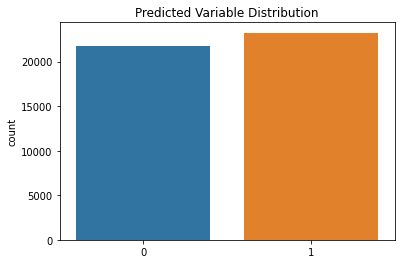

In [ ]:
# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model.predict_proba(test_df)[:, 1]

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

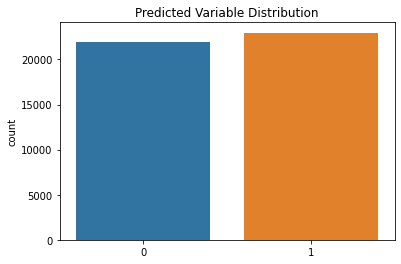

In [ ]:

# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model_lg.predict_proba(test_df)[:, 1]

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

In [ ]:
# Create a csv file and upload to zindi 
sub_file.to_csv('xgboostfeat_up.csv', index = False)
sub_file.head()

,ID,target
0,ID_0000005111,0.657141
1,ID_0000389416,0.146937
2,ID_0000634789,0.491214
3,ID_0000778100,0.971629
4,ID_0001123210,0.467678


###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
class MLP(nn.Module):
    """
    Very deep multi-layer perceptron with the number of layers and number of units chosen by the user. The activation functions used in between the layers 
    are rectified linear units (ReLU) except for the last layer where a sigmoid function is used. Also, half of the layers include each a dropout layer to prevent overfitting.
    """
    def __init__(self, inp_dim, dropout=0.1, n_layers=10, num_units=50, out_dim=2, seed=1):
        super(MLP, self).__init__()
        linears = []
        self.name = 'MLP'
        self.key_args = {"inp_dim": inp_dim, "n_layers": n_layers, "n_units": num_units, "seed": seed}
        self.n_layers = n_layers
        # number of units for each layer
        np.random.seed(seed)
        layer_dims = [inp_dim] + [num_units//np.random.choice(range(1,10)) for _ in range(n_layers-1)]+[out_dim]
        self.layer_dims = layer_dims
        for i in range(n_layers):
          if i == 0:
            linears.extend([nn.Linear(layer_dims[i], layer_dims[i+1]), nn.ReLU()])
          elif i < n_layers-1 and i%2==0:
            linears.extend([nn.Linear(layer_dims[i], layer_dims[i+1]), nn.ReLU()])
          elif i < n_layers-1 and i%2==1:
            linears.extend([nn.Linear(layer_dims[i], layer_dims[i+1]), nn.Dropout(dropout), nn.ReLU()])
          else:
            linears.extend([nn.Linear(layer_dims[i], layer_dims[i+1])])
        self.linears = nn.ModuleList(linears)
      
    def forward(self, x):
      for l in self.linears:
        x = x.view(x.shape[0], -1)
        #print(x.shape)
        x = l(x)
      return x

    def predict_probs(self, x):
        x = self.forward(x)
        return x

In [ ]:
    data = copy.deepcopy(train_data)
    if shuffle:
        range_id = list(range(data.shape[0]))
        np.random.shuffle(range_id)
        data = data.iloc[range_id]
    for size in range(0, data.shape[0], batch_size):
        b = data.iloc[size: size+batch_size].values.astype(float)
        x = b[:, :-1]
        x = torch.FloatTensor(x)
        y = torch.from_numpy(b[:, -1]).to(torch.long)
        yield (x,y)

In [ ]:
def load_test_data(test_data, batch_size=64): #was 2000
    for size in range(0, test_data.shape[0], batch_size):
        x = test_data.iloc[size: size+batch_size].values.astype(float)
        x = torch.FloatTensor(x)
        yield x

In [ ]:

def predict(test, model, batch_size=64): #was 50000
    Preds = []
    Yhat = []
    for x in load_test_data(test, batch_size=batch_size):
        x = x.to(device)
        yhat = model(x)
        preds = yhat.argmax(-1)
        Preds.extend(preds.tolist())
        Yhat.extend(yhat.tolist())
        #print("yhat", Yhat.shape)
    
    return Preds, Yhat

In [ ]:
def fit(model, criterion, train_data, optimizer, scheduler, n_epochs=10, batch_size=2048, print_every=2):
    best_weights = copy.deepcopy(model.state_dict())
    best_score = 0.3
    train_losses, valid_losses, train_acc, valid_acc = [], [], [], []
    with torch.autograd.set_detect_anomaly(True):
        for e in range(n_epochs):
            for phase in ["train", "val"]:
                if phase == "train":
                    running_loss = 0.0
                    score = 0.0
                    acc = 0.0
                    i = 0
                    model.train()
                    for x, y in load_train_data(train_data, batch_size=batch_size):
                        i += 1
                        x, y = x.to(device), y.to(device)
                        #print((x == np.nan).sum())
              
                        yhat = model(x)
                        #print(yhat)
                        optimizer.zero_grad()
                        #ipdb.set_trace()
                        loss = criterion(yhat, y)
                        running_loss += loss.item()
                        acc += float((yhat.argmax(-1)==y).sum())/float(y.shape[0])
                        score += f1_score(y.cpu(), yhat.cpu().argmax(-1), average='macro')
                        loss.backward()
                        optimizer.step()
                    scheduler.step()
                    train_losses.append(running_loss/i)
                    train_acc.append(acc/i)   
                    if e and e%print_every == 0:
                        print("Epoch: {}/{}".format(e+print_every, n_epochs))
                        print("Training: train_loss:{}, train_f1_score:{}, train_acc:{}".format(running_loss/i, score/i, acc/i))
                else:
                    running_loss = 0.0
                    score = 0.0
                    acc = 0.0
                    i = 0
                    model.eval()
                    for x, y in load_train_data(X_val, shuffle=False, batch_size=batch_size):
                        i += 1
                        x, y = x.to(device), y.to(device)
                        yhat = model(x)
                        loss = criterion(yhat, y)
                        running_loss += loss.item()
                        score += f1_score(y.cpu(), yhat.cpu().argmax(-1), average='macro')
                        acc += float((yhat.argmax(-1)==y).sum())/float(y.shape[0])
                    valid_losses.append(running_loss/i)
                    valid_acc.append(acc/i)
                    if score/i > best_score:
                            best_score=score/i
                            best_weights = copy.deepcopy(model.state_dict())
                    if e and e%print_every == 0:
                            #model.load_state_dict(best_weights)
                        print("Val: val_loss:{}, val_f1_score:{}, val_acc:{}".format(running_loss/i, score/i, acc/i))
    model.load_state_dict(best_weights)
    model.eval()
    #Ploting 
    _, ax = plt.subplots()
    ax.plot(train_losses[4:], 'k--', label='training loss', color='red')
    ax.plot(valid_losses[4:], 'k:', label='validation loss', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    _, Ax = plt.subplots()
    Ax.plot(train_acc, 'k--', label='training accuracy', color='blue')
    Ax.plot(valid_acc, 'k:', label='validation accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')


    legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
    Label = Ax.legend(loc='best', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('C0')
    Label.get_frame().set_facecolor('C0')

    #specify path

    path = "/content/drive/MyDrive/Berthine_AMMI_project/Model_saved/"


    plt.show()
    ans = input("Save model ? Answer y or n")
    if ans == 'y':
        torch.save(model.state_dict(), str(model.name)+"_"+str(model.key_args)+"_model.pt")
        print("Model saved")
    return model, train_losses, valid_losses

In [ ]:
import torch.optim.lr_scheduler as lr_scheduler
weight=torch.FloatTensor().to(device)
model = MLP(inp_dim=29, dropout=0.0, n_layers=4, num_units=15, seed=2).to(device)
print("number of units distribution across the layers", model.layer_dims)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=1.0)

In [ ]:
model, tr, val = fit(model, criterion, Xtr, optimizer, scheduler=scheduler, n_epochs=40, batch_size=64, print_every=5)